In [2]:
import pandas as pd

# Load Data
# Using pyarrow
train_df = pd.read_parquet('../data/original/train.parquet', engine='pyarrow')
test_df = pd.read_parquet('../data/original/test.parquet', engine='pyarrow')

# Exploratory Data Analysis (EDA)

### Initial Exploration

In [3]:
train_df.head()

,Unnamed: 0,index,claim_id,patent_application_id,cited_document_id,text,text_b,label,date,DIznQ_0
0,1305885.0,1305885.0,12227_1,EP2709205A1,EP2302733,The method of any one of claims 7 to 9 wherein...,The radiator 220 may be injectionmolded such t...,1.0,20140319.0,0.948644
1,1863129.0,1863129.0,13691_1,EP2789543A1,EP1050468,A unit as claimed in claim 13 or 14 wherein sa...,On entering aseptic chamber 15 portion 2a of s...,1.0,20141015.0,0.766244
2,2464554.0,2464554.0,117819_1,EP2869250A1,EP2487969,A power management program that causes a compu...,It will also be appreciated that while a curre...,1.0,20150506.0,0.706817
3,4378804.0,4378804.0,168575_1,EP3087917A1,EP2113290,The system according to claim 10 wherein the e...,In 404 it is evaluated if a trend may be found...,1.0,20161102.0,0.364632
4,148019.0,148019.0,270_1,EP2500407A1,EP2290046,The composition of claim 10 wherein the waterm...,The watersoluble solvent includes but is not l...,1.0,20120919.0,0.560511


In [4]:
test_df.head()

,index,claim_id,patent_application_id,cited_document_id,text,text_b,label,date,DIznQ_0
0,5908268.0,185449_1,EP3232604A1,EP2876857,The apparatus of claim 10 wherein the private ...,Upon receiving the request the cloud key manag...,1.0,20171018.0,0.828169
1,5260928.0,177213_0,EP3171449A1,EP2136431,The electrolyte of any of claims 13 wherein th...,The rechargeable lithiumair cell incorporating...,NaN,20170524.0,0.297525
2,5353323.0,180279_0,EP3178783A1,EP2811331,A device according to claim 2 or 3 wherein the...,Drive control of the laser scanning portion 1 ...,0.0,20170614.0,0.798218
3,5437800.0,122688_0,EP3185416A1,EP2648334,The electronic system according to claim 13 or...,In Example 7 the multistage charge amplifier o...,0.0,20170628.0,0.456076
4,5770091.0,203032_0,EP3213774A1,EP2340853,The biological indicator analyzer of any of cl...,The system depicted in Figures 27 and 30 may b...,0.0,20170906.0,0.853939


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3000 non-null   float64
 1   index                  2999 non-null   float64
 2   claim_id               3000 non-null   object 
 3   patent_application_id  3000 non-null   object 
 4   cited_document_id      3000 non-null   object 
 5   text                   3000 non-null   object 
 6   text_b                 3000 non-null   object 
 7   label                  3000 non-null   float64
 8   date                   3000 non-null   float64
 9   DIznQ_0                3000 non-null   float64
dtypes: float64(5), object(5)
memory usage: 236.8+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  799 non-null    float64
 1   claim_id               800 non-null    object 
 2   patent_application_id  800 non-null    object 
 3   cited_document_id      800 non-null    object 
 4   text                   800 non-null    object 
 5   text_b                 800 non-null    object 
 6   label                  799 non-null    float64
 7   date                   800 non-null    float64
 8   DIznQ_0                800 non-null    float64
dtypes: float64(4), object(5)
memory usage: 56.9+ KB


In [7]:
train_df.describe()

,Unnamed: 0,index,label,date,DIznQ_0
count,3.000000e+03,2.999000e+03,3000.000000,3.000000e+03,3000.000000
mean,2.506325e+06,2.504059e+06,0.584667,2.014775e+07,0.501175
std,1.440648e+06,1.442769e+06,0.492862,1.377118e+04,0.290670
min,1.088000e+03,1.088000e+03,0.000000,2.012070e+07,0.000468
25%,1.266688e+06,1.257558e+06,0.000000,2.014023e+07,0.247970
50%,2.545406e+06,2.545734e+06,1.000000,2.015060e+07,0.504459
75%,3.733760e+06,3.733331e+06,1.000000,2.016050e+07,0.754716
max,5.043389e+06,5.043389e+06,1.000000,2.017033e+07,0.999990


In [8]:
test_df.describe()

,index,label,date,DIznQ_0
count,7.990000e+02,799.000000,8.000000e+02,800.000000
mean,5.634715e+06,0.474343,2.017145e+07,0.494891
std,3.572878e+05,0.499654,2.436138e+03,0.293460
min,4.995310e+06,0.000000,2.017033e+07,0.001358
25%,5.328802e+06,0.000000,2.017061e+07,0.228553
50%,5.635883e+06,0.000000,2.017080e+07,0.489690
75%,5.933428e+06,1.000000,2.017102e+07,0.756504
max,6.258792e+06,1.000000,2.018013e+07,0.998995


#### Initial Observations:

1. Train Data:

Data Shape: The dataset contains 3030 rows and 10 columns.

Missing Values: Some columns have missing values. For instance:

Unnamed: 0: 30 missing values

index: 31 missing values

claim_id, patent_application_id, cited_document_id, text, text_b, label, date, DIznQ_0: 30 missing values

2. Test Data:

Data Shape: The dataset contains 808 rows and 9 columns

Similar to the training set there are missing values.

#### Columns Description:

Unnamed: 0, index: Seem to be index columns, might be redundant.

claim_id, patent_application_id, cited_document_id: Identifiers for patents and claims.

text, text_b: Textual data, for claims and descriptions.

label: Target variable, binary (0 or 1).

date: Numeric representation of a date, perhaps for the patent application. 

DIznQ_0: Numeric feature, perhaps a score or metric.

### Variable Analysis

For our text classification problem we can assume that the date is not an important feature. 

That leave us with the text, text_b columns as input features; label as the target variable; and DIznQ_0 as an interrogant. 

Let's explore further.

#### Target Variable Distribution

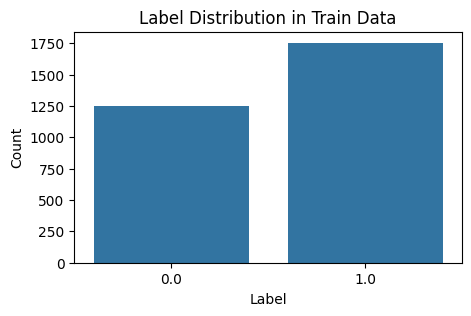

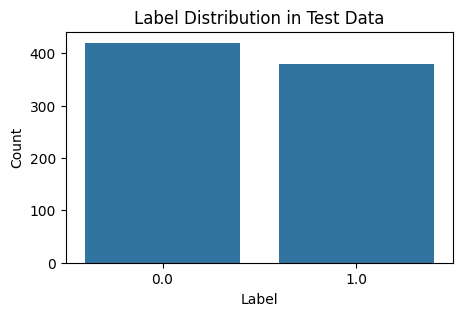

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns


# Plot for the target variable (label) distribution in train data
plt.figure(figsize=(5, 3))
sns.countplot(x='label', data=train_df)
plt.title('Label Distribution in Train Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Plot for the target variable (label) distribution in test data
plt.figure(figsize=(5, 3))
sns.countplot(x='label', data=test_df)
plt.title('Label Distribution in Test Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


The target variable is slightly umbalance on the training set but not at a magnitude for taking any precautionary measures.

Let's further inspect DIznQ_0.

#### DIznQ_0 Distribution Analysis

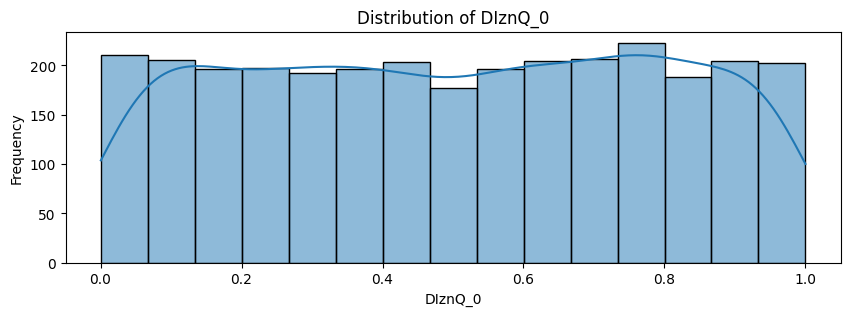

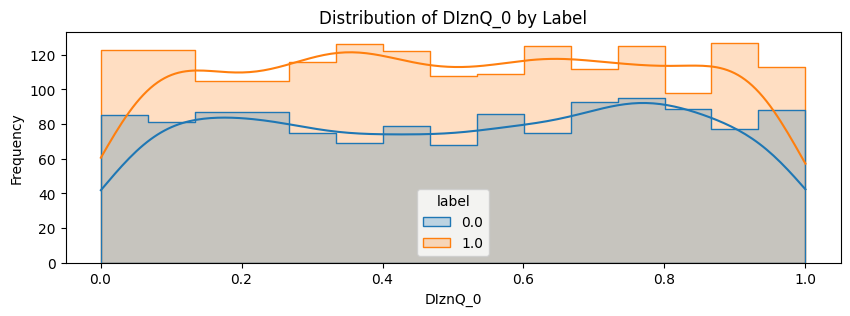

In [10]:
# Plot the distribution of DIznQ_0
plt.figure(figsize=(10, 3))
sns.histplot(train_df['DIznQ_0'], kde=True)
plt.title('Distribution of DIznQ_0')
plt.xlabel('DIznQ_0')
plt.ylabel('Frequency')
plt.show()

# Compare distribution of DIznQ_0 across different label values
plt.figure(figsize=(10, 3))
sns.histplot(data=train_df, x='DIznQ_0', hue='label', kde=True, element='step')
plt.title('Distribution of DIznQ_0 by Label')
plt.xlabel('DIznQ_0')
plt.ylabel('Frequency')
plt.show()


#### DIznQ_0 Correlation Analysis

In [11]:
# Calculate and display correlation with the target variable
correlation = train_df['DIznQ_0'].corr(train_df['label'])
print(f"Correlation between DIznQ_0 and label: {correlation}")

Correlation between DIznQ_0 and label: -0.01292528900552642


#### Statistical Test (t-test)

Performs a t-test to check if the mean of DIznQ_0 is significantly different between the classes of the target variable.

In [12]:
from scipy.stats import ttest_ind

# Drop rows where DIznQ_0 or label are NaN
cleaned_df = train_df.dropna(subset=['DIznQ_0', 'label'])

# Ensure DIznQ_0 is a numeric type
cleaned_df.loc[:, 'DIznQ_0'] = pd.to_numeric(cleaned_df['DIznQ_0'], errors='coerce')

# Check for variance
print("Variance of DIznQ_0 for label 0:", cleaned_df[cleaned_df['label'] == 0]['DIznQ_0'].var())
print("Variance of DIznQ_0 for label 1:", cleaned_df[cleaned_df['label'] == 1]['DIznQ_0'].var())

# Statistical Test (t-test)
# Separate DIznQ_0 values by label
label_0 = cleaned_df[cleaned_df['label'] == 0]['DIznQ_0']
label_1 = cleaned_df[cleaned_df['label'] == 1]['DIznQ_0']

# Perform t-test
t_stat, p_val = ttest_ind(label_0, label_1, nan_policy='omit')
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_val}")

Variance of DIznQ_0 for label 0: 0.0859700229875965
Variance of DIznQ_0 for label 1: 0.08352534800870284
T-test result: t-statistic = 0.7043388463833133, p-value = 0.4812770203497936


#### Conclusions

1. Distribution Analysis:

The distribution of DIznQ_0 is uniform, both when considered alone and against the target variable (label).
This uniform distribution suggests that DIznQ_0 does not have distinct patterns or clusters that differentiate between the classes of the target variable.

2. Correlation Analysis:

The correlation between DIznQ_0 and the target variable (label) is very low (-0.0129).
This indicates that there is almost no linear relationship between DIznQ_0 and label.

3. Variance Analysis:

The variances of DIznQ_0 for both labels are very similar (0.08597 for label 0 and 0.08353 for label 1).
The similarity in variances suggests that DIznQ_0 does not show different spread or variability for the different classes of the target variable.

4. T-test:

The t-test result shows a t-statistic of 0.704 and a p-value of 0.481.
The high p-value (greater than 0.05) indicates that the difference in means of DIznQ_0 between the two labels is not statistically significant.

Conclusion:
The analysis of the DIznQ_0 feature indicates that it is not a significant predictor of the target variable (label). The uniform distribution, low correlation, similar variances across labels, and non-significant t-test result all suggest that DIznQ_0 does not have a strong influence on the target variable.

Given these findings, I consider to exclude DIznQ_0 from the model.

### Missing Data Handling

In [13]:
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data


,Missing Values,Percentage
Unnamed: 0,30,0.990099
index,31,1.023102
claim_id,30,0.990099
patent_application_id,30,0.990099
cited_document_id,30,0.990099
text,30,0.990099
text_b,30,0.990099
label,30,0.990099
date,30,0.990099
DIznQ_0,30,0.990099


Since we are dealing with specific text data we need to delete the rows with missing and problematic values.

In [14]:
# Remove rows with missing values
cleaned_train_data = train_df.dropna()

# Verify that there are no more missing values
missing_values_after_cleaning = cleaned_train_data.isnull().sum()

missing_values_after_cleaning

Unnamed: 0               0
index                    0
claim_id                 0
patent_application_id    0
cited_document_id        0
text                     0
text_b                   0
label                    0
date                     0
DIznQ_0                  0
dtype: int64

In [15]:
cleaned_train_data.shape[0]

2741

In [16]:
# Remove rows with missing values
cleaned_test_data = test_df.dropna()

# Verify that there are no more missing values
missing_values_after_cleaning = cleaned_test_data.isnull().sum()

missing_values_after_cleaning

index                    0
claim_id                 0
patent_application_id    0
cited_document_id        0
text                     0
text_b                   0
label                    0
date                     0
DIznQ_0                  0
dtype: int64

In [17]:
cleaned_test_data.shape[0]

741

After seing the count of values left we can see that many values were dropped, this is an indication that the missing values are dispersed and are not entire empty rows. To minimize the number of rows dropped I will only take the principal columns text, text_b, and label, and then drop the rows with missing values. 

In [18]:
# Select only the 3 principal columns: text, text_b, and label
new_train_data = train_df[['text', 'text_b', 'label']]
new_test_data = test_df[['text', 'text_b', 'label']]

# Display initial shape
train_shape = new_train_data.shape
test_shape = new_test_data.shape
print(f"Train shape: {train_shape}. Test shape: {test_shape}")

# Drop rows with null values in the selected columns
cleaned_train_data = new_train_data.dropna()
cleaned_test_data = new_test_data.dropna()

# Display final shape
afterdrop_train_shape = cleaned_train_data.shape
afterdrop_test_shape = cleaned_test_data.shape
print(f"Final shape after dropping rows with null values, Train: {afterdrop_train_shape}. Test: {afterdrop_test_shape}")

Train shape: (3030, 3). Test shape: (808, 3)
Final shape after dropping rows with null values, Train: (2941, 3). Test: (783, 3)


Well, now we have more data to work :)

Now I want to ensure type consistency for the training and test data. For that I will separate inconsistent rows for further inspection.

In [19]:
# Function to ensure consistent data types and separate invalid rows
def ensure_and_separate_types(df):
    # Create DataFrames to hold valid and invalid rows
    valid_rows = []
    invalid_rows = []
    
    # Iterate over rows to check types
    for index, row in df.iterrows():
        if isinstance(row['text'], str) and isinstance(row['text_b'], str) and isinstance(row['label'], (int, float)):
            # If types are correct, add to valid_rows
            valid_rows.append(row)
        else:
            # If types are incorrect, add to invalid_rows
            invalid_rows.append(row)
    
    # Convert lists to DataFrames
    valid_df = pd.DataFrame(valid_rows)
    invalid_df = pd.DataFrame(invalid_rows)
    
    # Ensure consistent types for valid rows
    valid_df['text'] = valid_df['text'].astype(str)
    valid_df['text_b'] = valid_df['text_b'].astype(str)
    valid_df['label'] = valid_df['label'].astype(int)
    
    return valid_df, invalid_df

# Apply the function to the cleaned training and test dataset
valid_train_data, invalid_train_data = ensure_and_separate_types(cleaned_train_data)
valid_test_data, invalid_test_data = ensure_and_separate_types(cleaned_test_data)

# Final counts of the training and test data
train_count = valid_train_data.shape[0]
test_count = valid_test_data.shape[0] 

invalid_train_count = invalid_train_data.shape[0]
invalid_test_count = invalid_test_data.shape[0] 

# Verifying data types
train_data_types = valid_train_data.dtypes[['text', 'text_b', 'label']]
test_data_types = valid_test_data.dtypes[['text', 'text_b', 'label']]  

print(f"Final count of valid training data: {train_count}")
print("Training data types:")
print(train_data_types)

print(f"Final count of valid test data: {test_count}")  
print("Test data types:")  
print(test_data_types)  

print(f"Invalid train count {invalid_train_count}")
print(f"Invalid test count {invalid_test_count}")


Final count of valid training data: 2941
Training data types:
text      object
text_b    object
label      int32
dtype: object
Final count of valid test data: 783
Test data types:
text      object
text_b    object
label      int32
dtype: object
Invalid train count 0
Invalid test count 0


### Word count stats and distribution

In [22]:
# Function to calculate word counts
def calculate_word_counts(series):
    return series.apply(lambda x: len(str(x).split()))

# Calculate word counts for text and text_b in both train and test datasets
train_text_word_counts = calculate_word_counts(valid_train_data['text'])
train_text_b_word_counts = calculate_word_counts(valid_train_data['text_b'])
test_text_word_counts = calculate_word_counts(valid_test_data['text'])
test_text_b_word_counts = calculate_word_counts(valid_test_data['text_b'])

# Generate statistics for word counts
train_text_stats = train_text_word_counts.describe()
train_text_b_stats = train_text_b_word_counts.describe()
test_text_stats = test_text_word_counts.describe()
test_text_b_stats = test_text_b_word_counts.describe()

# Display statistics
print("Training Data 'text' Word Count Statistics:")
print(train_text_stats)
print("\nTraining Data 'text_b' Word Count Statistics:")
print(train_text_b_stats)
print("\nTest Data 'text' Word Count Statistics:")
print(test_text_stats)
print("\nTest Data 'text_b' Word Count Statistics:")
print(test_text_b_stats)

Training Data 'text' Word Count Statistics:
count    2941.000000
mean       64.065284
std        55.693413
min         9.000000
25%        30.000000
50%        45.000000
75%        77.000000
max       436.000000
Name: text, dtype: float64

Training Data 'text_b' Word Count Statistics:
count    2941.000000
mean       94.837130
std        70.938771
min         1.000000
25%        47.000000
50%        79.000000
75%       124.000000
max      1366.000000
Name: text_b, dtype: float64

Test Data 'text' Word Count Statistics:
count    783.000000
mean      66.983397
std       62.137715
min        8.000000
25%       29.000000
50%       44.000000
75%       82.500000
max      616.000000
Name: text, dtype: float64

Test Data 'text_b' Word Count Statistics:
count    783.000000
mean      92.734355
std       68.530359
min        1.000000
25%       47.000000
50%       75.000000
75%      118.000000
max      501.000000
Name: text_b, dtype: float64


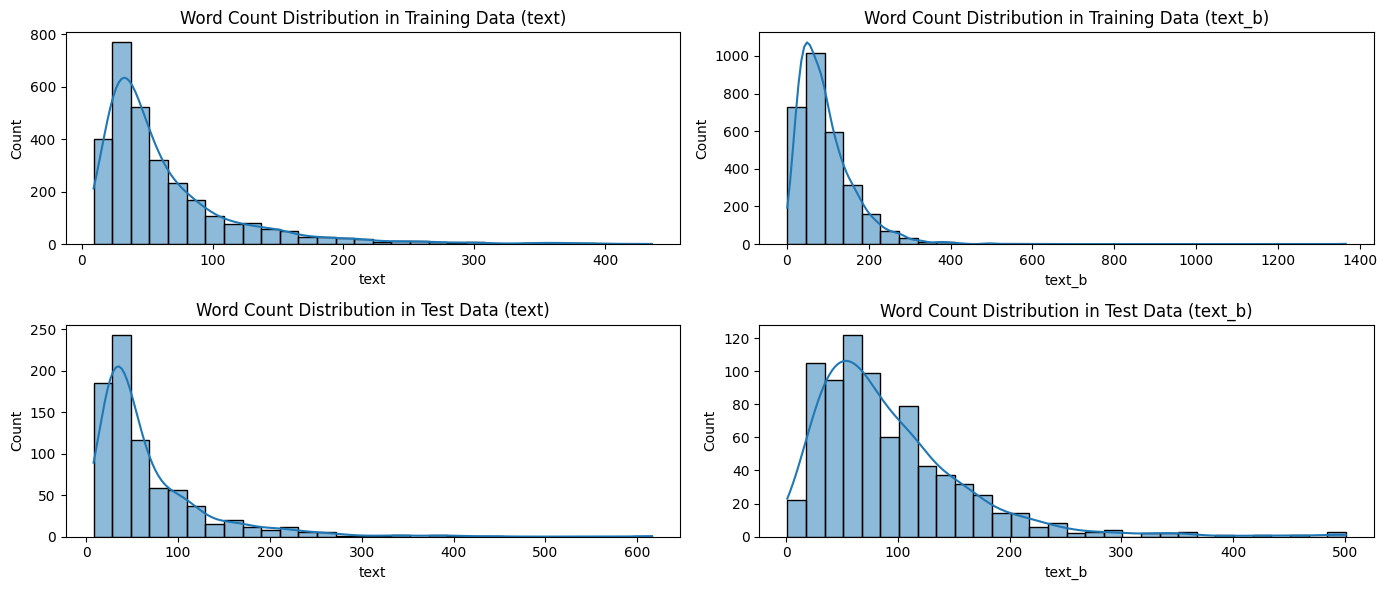

In [23]:
# Visualize word count distributions
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.histplot(train_text_word_counts, kde=True, bins=30)
plt.title('Word Count Distribution in Training Data (text)')

plt.subplot(2, 2, 2)
sns.histplot(train_text_b_word_counts, kde=True, bins=30)
plt.title('Word Count Distribution in Training Data (text_b)')

plt.subplot(2, 2, 3)
sns.histplot(test_text_word_counts, kde=True, bins=30)
plt.title('Word Count Distribution in Test Data (text)')

plt.subplot(2, 2, 4)
sns.histplot(test_text_b_word_counts, kde=True, bins=30)
plt.title('Word Count Distribution in Test Data (text_b)')

plt.tight_layout()
plt.show()

The max amount of words we have on the dataset is 1982, max(text + text_b) in the training data. 

Adding a few more words for a prompt we could expect that a model with a input context of 8k tokens would be fine for the task.

Now we have the data without null values and with consistent data

### Save the final data in csv and jsonl for training 

In [21]:
# Save the cleaned data to CSV
valid_train_data.to_csv('../data/transformed/cleaned_train_data.csv', index=False)
valid_test_data.to_csv('../data/transformed/cleaned_test_data.csv', index=False)

# Save the cleaned data to JSON Lines (jsonl)
valid_train_data.to_json('../data/transformed/cleaned_train_data.jsonl', orient='records', lines=True)
valid_test_data.to_json('../data/transformed/cleaned_test_data.jsonl', orient='records', lines=True)